# 2.6 - Multimodal architectures

In [1]:
!pip install tensorflow==2.15

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [2]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

replicating local resources


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
%matplotlib inline
import tensorflow as tf
tf.__version__

'2.15.0'

In [4]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


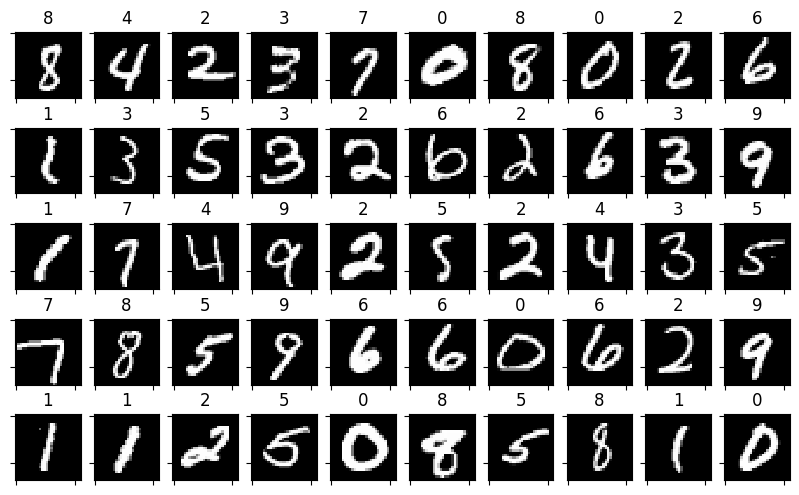

In [5]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

## A regular neural network for classification

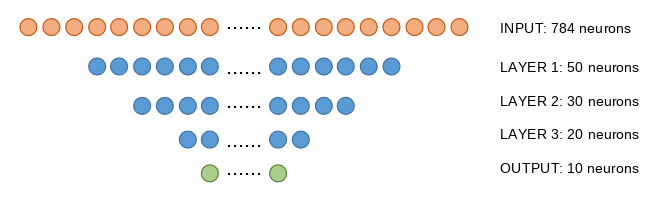

In [ ]:
Image(filename='local/imgs/ann1.png')

Number of connections:

    INPUT to LAYER 1:    784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:   50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:   30*20 + 20 (bias) = 620
    LAYER 3 to OUTPUT:    20*10 + 10 (bias) = 210
    
                                         TOTAL 41610

observe we convert `y` to a one_hot encoding

In [6]:
yoh = np.eye(10)[y]

In [7]:
i = np.random.randint(len(y))
y[i], yoh[i]

(1, array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.8)

X_train, X_test, y_train, y_test = X[:300], X[300:], y[:300], y[300:]
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape)

(300, 784) (300, 10)


### create the model

In [9]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session

In [10]:
def get_model_A(input_dim, s1, s2, s3, s3_activation="relu"):
    print(input_dim*s1 + s1*s2 + s2*s3 + s3*10 + s1+s2+s3+10)
    clear_session()
    model = Sequential()
    model.add(Dense(s1, activation='relu', input_dim=input_dim))
    model.add(Dense(s2, activation='relu'))
    model.add(Dense(s3, activation=s3_activation))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

In [11]:
model = get_model_A(input_dim=X.shape[1], s1=50, s2=30, s3=20)
model.summary()

41610
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
Total params: 41610 (162.54 KB)
Trainable params: 41610 (162.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### fit and display losses

In [12]:
model.fit(X_train, y_train_oh, epochs=100, batch_size=32, validation_data=(X_test, y_test_oh))

Epoch 1/100
10/10 [==============================] - 1s 34ms/step - loss: 2.2716 - val_loss: 2.2109
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 2.0882 - val_loss: 2.0751
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.8556 - val_loss: 1.8761
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 1.5816 - val_loss: 1.6435
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 1.3152 - val_loss: 1.4306
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 1.0814 - val_loss: 1.2625
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.8772 - val_loss: 1.1062
Epoch 8/100
10/10 [==============================] - 0s 12ms/step - loss: 0.7174 - val_loss: 0.9957
Epoch 9/100
10/10 [==============================] - 0s 22ms/step - loss: 0.5797 - val_loss: 0.9217
Epoch 10/100
10/10 [==============================] - 0s 11ms/step - loss: 0.4637 - val_loss: 0.8687

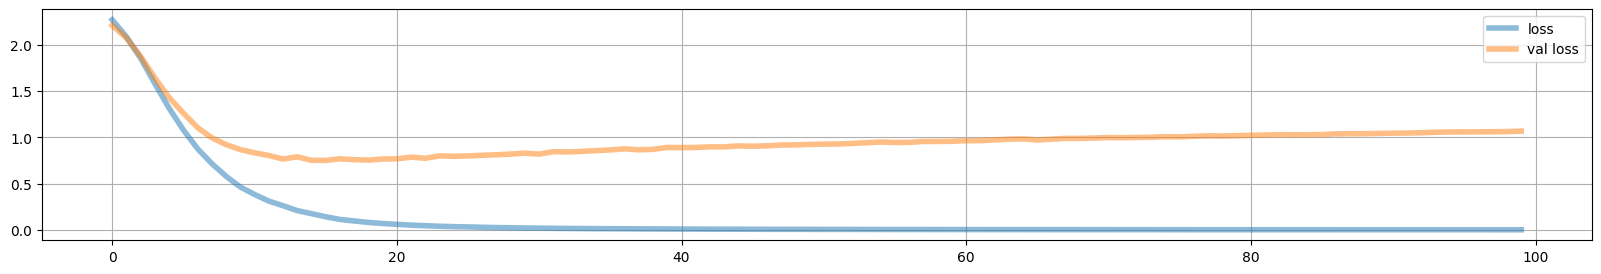

In [13]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

### measure accuracies

- why are we using argmax below?

In [14]:
preds_train = model.predict(X_train).argmax(axis=1)
preds_test = model.predict(X_test).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

38/38 [==============================] - 0s 2ms/step
accuracy train 1.000
accuracy test  0.798


## Multimodal network

We will simulate we have information about our data from an additional source. This can be the case when we have, for instance, medical images and associated clinical data. In this situation we have **multimodal data** (images and numeric).

We would like to have an arquitecture in which we can inject both image and numeric data.

In this case, we assume we have an additional information source, telling us with a size 2 vector whether each image contains an odd or even number (with vaues `[1 0]`  or `[0 1]`)

This new info **is injected at LAYER 3** simply concatenating the neurons

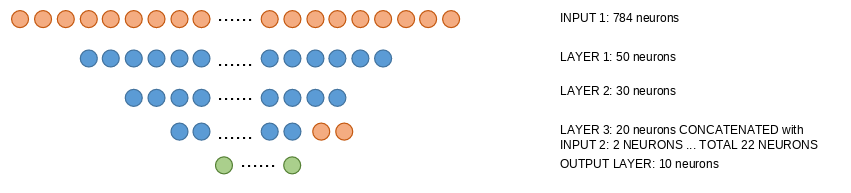

In [ ]:
Image(filename='local/imgs/ann2.png')

Number of connections:


    INPUT 1 to LAYER 1:              784*50 + 50 (bias) = 39250
    LAYER 1 to LAYER 2:               50*30 + 30 (bias) = 1530
    LAYER 2 to LAYER 3:               30*20 + 20 (bias) = 620
    LAYER 3 + INPUT 2 to OUTPUT:  (20+2)*10 + 10 (bias) = 230
    
                                                    TOTAL 41630

observe how this new architecture is built, and how the two kinds of information are handled both when building the network or when fitting or predicting

In [15]:
def get_model_B(input_dim, extra_info_dim,  s1, s2, s3, s3_activation="relu"):
    clear_session()
    inp1 = Input(shape=(input_dim,), name="input_img")
    l11 = Dense(s1, activation="relu", name="dense1")(inp1)
    l12 = Dense(s2, activation="relu", name="dense2")(l11)
    l13 = Dense(s3, activation=s3_activation, name="dense3")(l12)

    inp2 = Input(shape=(extra_info_dim,), name="input_extra")
    cc1 = tf.concat([l13, inp2],axis=1) # Merge row, same column
    output = Dense(10, activation='softmax', name="output")(cc1)
    model = Model(inputs=[inp1, inp2], outputs=output)

    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model.reset_states()
    return model

We simulate extra information, we could actually have several choices to encode this information, for instance

- `[ 1, 0] [ 0, 1]` or
- `[ 1,-1] [-1, 1]` or
- `[10, 0] [ 0,10]` among others

Observe how **k0**, **k1** control how the data is represented. Try:
    
- k0=0, k1=1
- k0=-0.5, k1=2
- k0=0, k2=10
- k0=-0.5, k1=20

to understand how this coding affects the representation

In [16]:
def get_X_extra(y_train, y_test, k0, k1):
    X_train_extra = (np.eye(2)[y_train%2]+k0)*k1
    X_test_extra  = (np.eye(2)[y_test%2]+k0)*k1
    return X_train_extra, X_test_extra

X_train_extra, X_test_extra = get_X_extra(y_train, y_test, k0=-.5, k1=2)
X_train_extra[:10]

array([[-1.,  1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.],
       [-1.,  1.]])

In [17]:
model = get_model_B(input_dim=X.shape[1], extra_info_dim=X_train_extra.shape[1], s1=50, s2=30, s3=20,
                   s3_activation="tanh")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 784)]                0         []                            
                                                                                                  
 dense1 (Dense)              (None, 50)                   39250     ['input_img[0][0]']           
                                                                                                  
 dense2 (Dense)              (None, 30)                   1530      ['dense1[0][0]']              
                                                                                                  
 dense3 (Dense)              (None, 20)                   620       ['dense2[0][0]']              
                                                                                              

In [18]:
model.fit([X_train, X_train_extra], y_train_oh, epochs=100, batch_size=32,
          validation_data=([X_test, X_test_extra], y_test_oh))

Epoch 1/100
10/10 [==============================] - 1s 31ms/step - loss: 2.1703 - val_loss: 2.0889
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.8970 - val_loss: 1.8928
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.6626 - val_loss: 1.7244
Epoch 4/100
10/10 [==============================] - 0s 13ms/step - loss: 1.4661 - val_loss: 1.5671
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 1.2895 - val_loss: 1.4277
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 1.1382 - val_loss: 1.3057
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.9981 - val_loss: 1.1799
Epoch 8/100
10/10 [==============================] - 0s 12ms/step - loss: 0.8729 - val_loss: 1.0814
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 0.7631 - val_loss: 0.9946
Epoch 10/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6561 - val_loss: 0.9321

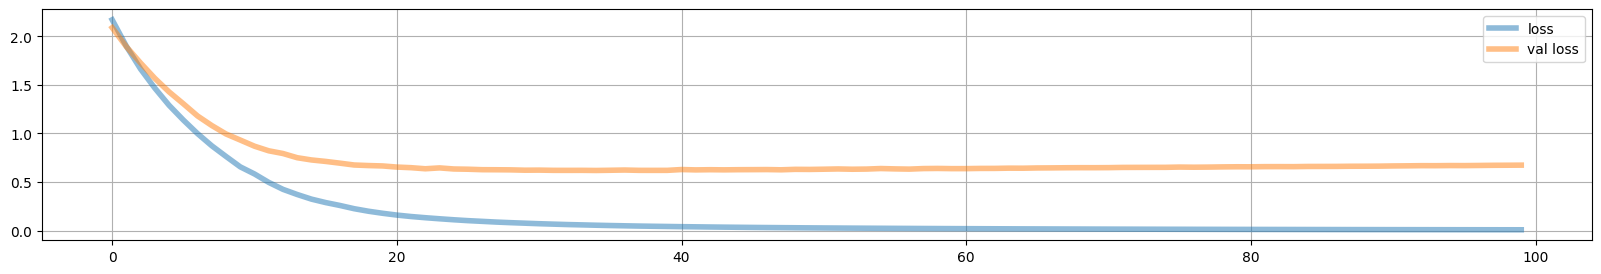

In [19]:
plt.figure(figsize=(20,3))
loss  = model.history.history["loss"]
vloss = model.history.history["val_loss"]
plt.plot(loss, lw=4, alpha=.5, label="loss")
plt.plot(vloss, lw=4, alpha=.5, label="val loss")
plt.grid();
plt.legend();

In [20]:
preds_train = model.predict([X_train, X_train_extra]).argmax(axis=1)
preds_test = model.predict([X_test, X_test_extra]).argmax(axis=1)

print("accuracy train %.3f"%(np.mean(preds_train==y_train)))
print("accuracy test  %.3f"%(np.mean(preds_test==y_test)))

38/38 [==============================] - 0s 1ms/step
accuracy train 1.000
accuracy test  0.818
